# Workshop 1: Open Source AI is Awesome! 🚀

- **When:** Wednesday, 5th February, 17:00.
- **Where:** Appleton Tower, 5.04. If you don't have access, reach out and we'll let you in!
- **Contacts:** Reach out on Instagram _@edinburgh.ai_
- **Credits:** This notebook is created by EdinburghAI for use in its workshops. If you plan to use it, please credit us!

## Today
- Building an actually good Spotify DJ! 🎸
- There'll be two hosts talking to eachother out loud! 🎤
- What'll they talk about? Whatever the user wants! They'll use my University notes as a source of information! 📚 
  - Ok I know that sounds lame, but the idea is to take boring uni materials and make them into an interesting radio show! 

Lfg 🔥

# Instructions:

This is a Jupyter notebook. It contains cells. There are 2 kinds of cells - markdown and Python. Markdown cells are like this one, and are just there to give you information. Python cells run code. You can run a cell with `Ctrl + Enter` or run a cell and move the next one with `Shift + Enter`. Try running the cell below.


In [ ]:
print('Ctrl + Enter runs this cell!')
output = 'The last line of a cell is printed by default'
output

#### What YOU Need To Do
    
- There are places to write code, indicated by `...` and a comment with `TODO:` in a python cell. You should fill these in or nothing will work! If you have any questions, just ask one of the EdinburghAI people :)

- There are points to stop and think indicated by **Think🤔**. Please stop, think, maybe write an answer, and discuss with those around you.

- There are also questions labelled **Extension😈**. These are more optional, and are for those of you who might have done some similar stuff before. Feel free to have a think about these questions though!

Good luck!

## So What're We Building? 🛠️

Here's the vision: 

- Gone are the days we have to read boring university notes! With our brand new radio show, you'll be able to learn your uni material in an actually fun way!  
- The radio show will have 2 hosts. 
- The user will ask a (uni-related) question.
- The hosts will use my uni notes (hosted on [www.leocamacho.co](www.leocamacho.co)) to answer the question. (Shameless self-promo i.k. lol)
- The hosts will talk to eachother out loud! 🎤


## The Tech Stack 🤔

- We'll use an _open_ LLM to generate the conversation in full.
- We'll use a _open_ TTS model to generate the audio of each speaker.
- We'll use an _open_ embedding model to store all of our notes as vectors. Then when the user asks a question, we'll use the embedding model to find the most similar notes and use them to answer the question. 


# Using RAG to answer questions! 🔍

We want our model to take our Uni notes and use them to generate a conversation. But it would be incredibly innefficient to pass every single note into the model. Instead, we'll use a technique called _RAG_ (Retrieval Augmented Generation). 

RAG is a technique where we first _embed_ our notes, and then use a _similarity search_ to find the most relevant notes to the user's question. We'll then pass these notes into the model to answer the question. (I.e. Retrieve a note and pass it into the prompt of the model)

How do we do this?

### Creating The Vector Database 🔍

We're going to use the Uni notes from my website ([www.leocamacho.co](www.leocamacho.co)) as the source of truth for our RAG system. I recommend checking it out and going searching for some notes. I've got pretty extensive notes for Computer Systems, Intro to Algorithms and Data Structures, and Computer Security. 

##### Note:
Since none of the notes are too long, we can load the entire note as a single vector. If we instead had a single very long pdf, or multiple long notes, we'd have to split them into chunks. We'd have use something like [LangChain's Sentence Splitter](https://python.langchain.com/api_reference/text_splitters/sentence_transformers/langchain_text_splitters.sentence_transformers.SentenceTransformersTokenTextSplitter.html) to do this. 

To access the notes on the Kaggle Notebook, do the following. Alternatively, if you're running this notebook somewhere else, you can [download the dataset here](https://www.kaggle.com/datasets/leocamacho1/leos-university-notes/data).

- Click Add Input -> Datasets
- Search 'EdinburghAI-Sem2-WS1-UniNotes'
- Click the '+' icon

In [2]:
import pandas as pd 

df = pd.read_csv("/kaggle/input/leos-university-notes/notes_dataset.csv")
df.head()

# Take just the Content column and make it into a list. 
# We'll use this list as the embeddings of our notes.
notes = df["Content"].tolist()

### Embedding The Notes 🔍

We'll use [Sentence Transformer](https://www.sbert.net/) to vectorise the notes, and [FAISS](https://github.com/facebookresearch/faiss) to store them (and perform similarity searches). 

First, let's find which embedding model we'll use. HuggingFace has a [list of embedding models](https://huggingface.co/models?library=sentence-transformers&amp;author=sentence-transformers). HuggingFace is like the GitHub of open source AI models, datasets and more. 



In [ ]:
from sentence_transformers import SentenceTransformer

# TODO:Load the model and encode the notes. Loading and encoding typically takes ~2 minutes the first time you run it.
# You can make it faster by adding a GPU to this notebook. I highly recommend doing this. 
model = ...
embeddings = ...

In [ ]:
!pip install faiss-cpu

In [ ]:
# We'll use FAISS to store the embeddings. 
import faiss


# TODO: First, find out how many dimensions there are in the embeddings. 
# You can either check the model's description, or print the *shape* of the embeddings 😉
dimension = embeddings.shape[1]
print(f"Embedding dimensions: {dimension}")

In [ ]:
# TODO: We'll need to store the embeddings somewhere. 
# You can think of the "Index" of FAISS as a database, one optimised for similarity searches.
# I recommend using Flat L2 Index. It's fast and works well for our use case.
index = ...

# TODO: Now, add the embeddings to the index.
index.add(...)

# Print how many vectors are in the index.
print(f"Total vectors {index.ntotal}")


In [ ]:
# Now, we'll use the index to find the most similar vectors to a query.
query = "How does attention work?"
query_embedding = ...

# We'll use the index to find the most similar vectors to the query. I recommend setting k to 1 (But feel free to experiment!).
k = ... # Num nearest neighbours
# TODO: Search and return the distances and indices of the nearest neighbours.
distances, indices = ...

# Use some python magic to get the corresponding relevant notes (in English), using the indices we found from above.
# Hint: The indices are the indices (of the relevant notes) correspond to the notes in the original list.
relevant_notes = [notes[i] for i in indices[0]]

# Now, we'll print the most similar vectors to the query.
print(f"Nearest Neighbours: {...}")

# Now Let's Generate The Conversation! 🎤

We're going to use Meta's Llama 3.2 model. It's got 1 billion parameters. While that sounds like a lot, it's actually small enough to run on your _phone_ (assuming you've got a good one). Think about that for a second. _All of the world's knowledge_ stored in your pocket, accessible without an internet connection.

### Generating Text with Ollama 🦙
Ollama is a light weight, open source platform for running LLMs, _locally_. It's super powerful, but we'll just use the basic functionality for now - i.e. generating text.

In [ ]:
# First, let's install Ollama:
!apt install -y pciutils
!curl https://ollama.ai/install.sh | sh
!pip install ollama

# In order to run Ollama on this Kaggle workshop, we've got to do a few extra steps.
# Normally, when you run Ollama, you can do it with the command `ollama serve`.

import threading
import subprocess
import time
import ollama

def run_ollama_serve():
    subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()

# Wait for the ollama server to start
time.sleep(3)


In [22]:
# Try pass this into the model so it can talk about it!
dummy_news_article = "In the early hours of the morning, a UFO was spotted hovering over the city of Edinburgh. The UFO was described as having a bright red light and a pulsating green light. The UFO was seen by multiple witnesses and was reported to the police. The police are investigating the incident and have asked for any witnesses to come forward."

In [ ]:
# TODO: Now, pull the model. After all, we need to load the model if we want to use it. 
# I recommend using Llama 3.2 (3b version).
ollama.pull(...)

# TODO: Now, generate text with the model:
response = ollama.chat(model='llama3.2:3b', messages=[
    {
        'role': '...', 
        'content': '...'
    },
    {
        'role': '...',
        'content': '...'
    },
])
print(response['message']['content'])

### Generating A Radio Show:
Let's think this through:
- We want a conversation between 2 speakers.
- Ideally, it's formatted in such a way that we can easily extract the dialogue of each speaker. 
- We want each speaker to have some personality, and for them to have some banter. 
- We also want to pass in the notes and for them to talk about it.

Essentially, we want to create something like this (if they were asked to talk about the _Attention_ note.):

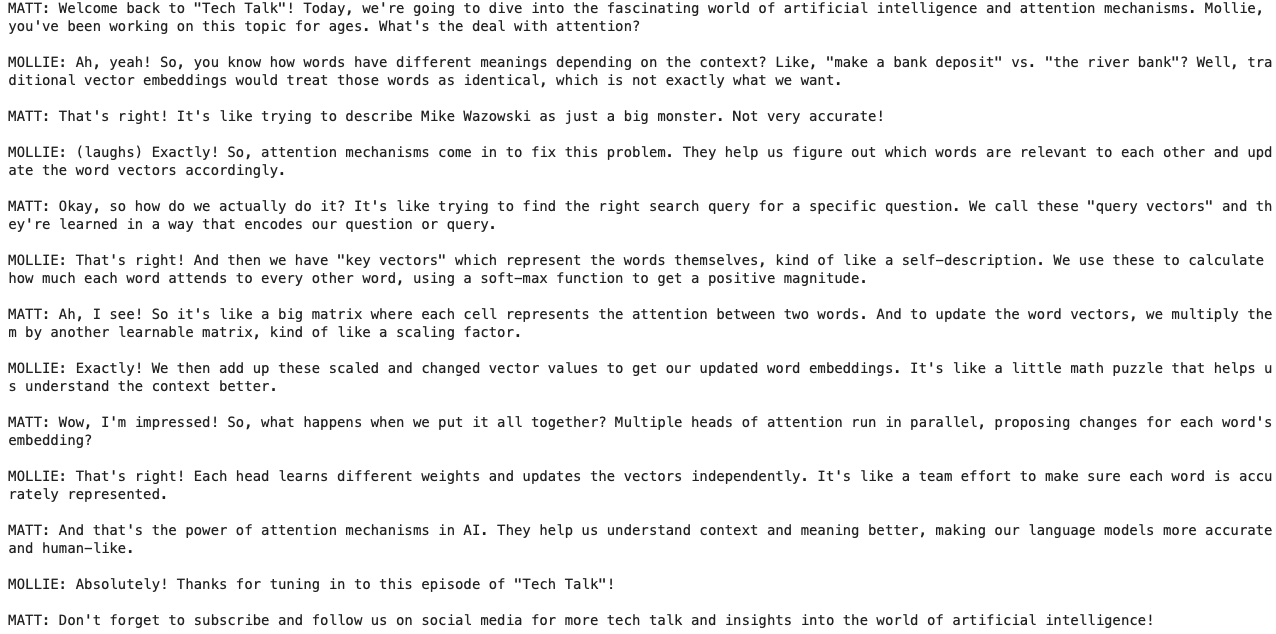




##### Prompt Engineering 📝:
I personally hate this term. But these models are weird forms of _"alien"_ intelligence, and we've got to try and get them to do what we want. But how? By learning how to best ask (prompt 😉) it! 

Below are the most relevant tips for our use case:
- [Be clear and specific](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/be-clear-and-direct)
- [Give examples](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/multishot-prompting)
- [Use XML/HTML tags](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/use-xml-tags)
- [Prefill the model with information](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/prefill-claudes-response)

In [30]:
RADIO_SYSTEM_PROMPT = "..."

In [ ]:

# TODO: Now, generate text for our radio show conversation!
# Because the prompt is long, and the notes are long, this takes a while on pure CPU.
# Try adding a GPU or making some optimisations!
response = ollama.chat(model='llama3.2:3b', messages=[
  {
    'role': '...',
    'content': ...
  },
    {
    'role': '...',
    'content': ...
    },
])

conversation_transcript = response['message']['content']

print(conversation_transcript)

## Generating Audio 🎧

Finally, we'll be generating the audio for our radio show. Text-To-Speech is hard and typically a lot more expensive than text-to-text. The best models are _incredibly_ [expensive](https://elevenlabs.io/pricing). Fortunately, we've got a great open source model called [Kokoro](https://huggingface.co/hexgrad/Kokoro-82M).

_**Think**_ 🤔 _: Why do you think Text-To-Speech is far more expensive than just pure text generation?_

In [ ]:
# Install and import everything we need for TTS
!git lfs install
!git clone https://huggingface.co/hexgrad/Kokoro-82M
%cd Kokoro-82M
!apt-get -qq -y install espeak-ng > /dev/null 2>&1
!pip install -q phonemizer torch transformers scipy munch

In [ ]:
from models import build_model
from kokoro import generate
import torch

# If we've got a Cuda GPU, we'll use it. Otherwise, we'll use the CPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
MODEL = build_model('kokoro-v0_19.pth', device)

# Let's use the conversation transcript we generated earlier.
print(conversation_transcript)


In [35]:
# A list of all of the voices we have available.
VOICE_NAME = [
    'af', # Default voice is a 50-50 mix of Bella & Sarah
    'af_bella', 'af_sarah', 'am_adam', 'am_michael',
    'bf_emma', 'bf_isabella', 'bm_george', 'bm_lewis',
    'af_nicole', 'af_sky',
][0]

# Language is determined by the first letter of the VOICE_NAME:
# 🇺🇸 'a' => American English => en-us
# 🇬🇧 'b' => British English => en-gb
# The US accent sounds more realistic 
# THINK 🤔: Why do you think this is?

# By default, the generate() function returns 24khz audio and the phonemes used.
# Phonemes are the smallest units of sound in a language. Check my notes out on Phonemes 😉.

In [ ]:
import numpy as np
# It's computationally expensive to load each speaker's voice model. To save some time, we should 
# split the conversation into two, and generate the ALL the audio for each speaker at a time.

# Let's split the conversation into individual dialogues first. 
# This is why having the output formatted in the way we did is so useful!
speeches = []

for line in conversation_transcript.split('\n'):
    if 'matt:' in line.lower():
        speeches.append(line.split(':',1)[1].strip())
    elif 'mollie:' in line.lower():
        speeches.append(line.split(':',1)[1].strip())


# Split the speeches into two lists, one for each speaker. Some pythonic slicing magic!
# TODO: Take all of the even speeches and put them into a list called speaker1_speeches.
# TODO: Take all of the odd speeches and put them into a list called speaker2_speeches.
speaker1_speeches = ...
speaker2_speeches = ...


speaker1_audio = []
speaker2_audio = []


# Generate the audio for speaker 1.
VOICEPACK_SPEAKER1 = torch.load(f'voices/am_michael.pt', weights_only=True).to(device)

for i, speech in enumerate(speaker1_speeches):
    print(f"Generating audio {i+1} for speaker 1")
    audio, _ = ...
    speaker1_audio.append(audio)


# Generate the audio for speaker 2.
VOICEPACK_SPEAKER2 = torch.load(f'voices/af.pt', weights_only=True).to(device)

for i, speech in enumerate(speaker2_speeches):
    print(f"Generating audio {i+1} for speaker 2")
    audio, _ = ...
    speaker2_audio.append(audio)


# Combine the audios into a single list using some more pythonic fun :)
conversation_audio = []

for audio1, audio2 in zip(speaker1_audio, speaker2_audio):
    conversation_audio.extend([audio1, audio2])

# Combine all the audio into a single audio file and play it in a python notebook
from IPython.display import display, Audio

final_audio = np.concatenate(conversation_audio)
display(Audio(data=final_audio, rate=24000, autoplay=True))